# DATA ANALYTICS HW02

Importing all the packages required

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import gc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,r2_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
import re
from impyute.imputation.cs import mice
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

Reading both the training and testing data

In [2]:
df=pd.read_csv("C:/Users/rtd91/OneDrive/Syracuse University/IST 707/Homework2/Weather Forecast Training.csv")
tempdf=df
df1=pd.read_csv("C:/Users/rtd91/OneDrive/Syracuse University/IST 707/Homework2/Weather Forecast Testing.csv")
tempdf1=df1

In [3]:
df.head(5) #Training Dataset

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


In [4]:
df1.head(5) #Testing Dataset

,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,1,Perth,15.3,21.5,4.4,2.4,1.4,NW,70.0,W,22.0,69.0,997.6,7.0,19.8,Yes
1,2,Portland,7.1,11.0,38.8,1.2,5.8,SSE,48.0,SW,19.0,46.0,1014.0,4.0,10.7,Yes
2,3,Hobart,3.6,16.6,0.2,2.8,9.3,NW,37.0,N,15.0,48.0,1016.6,5.0,15.4,No
3,4,Woomera,17.6,37.4,0.0,34.0,NaN,NNW,37.0,NW,19.0,11.0,1010.4,2.0,34.6,No
4,5,Townsville,11.4,25.6,0.0,6.0,2.8,ESE,31.0,SSE,13.0,52.0,1016.4,7.0,24.3,No


In [5]:
df.shape

(51978, 16)

In [6]:
df1.shape

(12994, 16)

# Data Preparation:

Converting the categorical variables to numeric by label encoding for the processing of algorithms

In [7]:
le = preprocessing.LabelEncoder()
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.shape
for i in obj_df:
    le.fit(obj_df[i][obj_df[i].notna()].values)
    obj_df[i][obj_df[i].notna()] = le.transform(obj_df[i][obj_df[i].notna()].values)

In [8]:
le = preprocessing.LabelEncoder()
obj_df1 = df1.select_dtypes(include=['object']).copy()
obj_df1.shape
for i in obj_df1:
    le.fit(obj_df1[i][obj_df1[i].notna()].values)
    obj_df1[i][obj_df1[i].notna()] = le.transform(obj_df1[i][obj_df1[i].notna()].values)

In [9]:
obj_df = obj_df.apply(pd.to_numeric,axis =1)

In [10]:
obj_df1 = obj_df1.apply(pd.to_numeric,axis =1)

Dropping the categorical values and later adding the numeric version of these columns for algorithm processing.

In [11]:
tempdf=df
tempdf=tempdf.drop(["Location","WindGustDir","WindDir","RainToday","RainTomorrow"],axis=1)
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 11 columns):
MinTemp          51694 non-null float64
MaxTemp          51849 non-null float64
Rainfall         51231 non-null float64
Evaporation      29425 non-null float64
Sunshine         27103 non-null float64
WindGustSpeed    48407 non-null float64
WindSpeed        50954 non-null float64
Humidity         50549 non-null float64
Pressure         46912 non-null float64
Cloud            31848 non-null float64
Temp             50915 non-null float64
dtypes: float64(11)
memory usage: 4.4 MB


In [12]:
tempdf1=df1
tempdf1=tempdf1.drop(["Location","WindGustDir","WindDir","RainToday"],axis=1)
tempdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 12 columns):
ID               12994 non-null int64
MinTemp          12947 non-null float64
MaxTemp          12976 non-null float64
Rainfall         12833 non-null float64
Evaporation      7478 non-null float64
Sunshine         6900 non-null float64
WindGustSpeed    12074 non-null float64
WindSpeed        12733 non-null float64
Humidity         12645 non-null float64
Pressure         11701 non-null float64
Cloud            7974 non-null float64
Temp             12727 non-null float64
dtypes: float64(11), int64(1)
memory usage: 1.2 MB


# Checking which columns has how many null values

***There were a lot of missing values in the dataset so replacing it directly with mean/mode/median could just have made the data bias so instead I tried using knn imputation and mice imputation, MICE imputation gave better accuracy results so I decided to go with MICE. It takes a while for computation but handles the missing data appropriately. ***

In [13]:
df.isnull().sum() #checking which columns has how many null values

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

# Applying MICE imputation for Data Cleaning

The mice package implements a method to deal with missing data. The package creates multiple imputations (replacement values) for multivariate missing data. The method is based on Fully Conditional Specification, where each incomplete variable is imputed by a separate model. 
The MICE algorithm can impute mixes of continuous, binary, unordered categorical and ordered categorical data.
In addition, it can also process the two-level data.

In [14]:
# start the MICE training
imputed_training=mice(obj_df)

C:\Users\rtd91\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [15]:
# start the MICE training
imputed_testing=mice(obj_df1)

C:\Users\rtd91\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


Since MICE imputation makes the columns label to numeric in order(0,1,2..).
Renaming the columns for better understanding

In [16]:
imputed_training=imputed_training.rename(columns={0: "Location", 1: "WindGustDir",2: "WindDir",3: "RainToday",4: "RainTomorrow"})
imputed_training

,Location,WindGustDir,WindDir,RainToday,RainTomorrow
0,26.0,10.000000,10.0,0.0,1.0
1,28.0,13.000000,15.0,0.0,0.0
2,14.0,9.000000,12.0,1.0,1.0
3,6.0,15.000000,14.0,0.0,1.0
4,43.0,5.000000,2.0,0.0,0.0
...,...,...,...,...,...
51973,11.0,2.000000,9.0,1.0,1.0
51974,37.0,10.000000,9.0,1.0,1.0
51975,4.0,13.000000,13.0,1.0,1.0
51976,37.0,3.050274,0.0,0.0,0.0


In [17]:
imputed_testing=imputed_testing.rename(columns={0: "Location", 1: "WindGustDir",2: "WindDir",3: "RainToday"})
imputed_testing

,Location,WindGustDir,WindDir,RainToday
0,31.0,7.0,13.0,1.0
1,33.0,10.0,12.0,1.0
2,15.0,7.0,3.0,0.0
3,48.0,6.0,7.0,0.0
4,39.0,2.0,10.0,0.0
...,...,...,...,...
12989,30.0,12.0,12.0,0.0
12990,9.0,6.0,7.0,0.0
12991,12.0,14.0,6.0,0.0
12992,29.0,14.0,6.0,0.0


Storing the imputed values back into the dataframes's new collumns for easier processing

In [18]:
tempdf["Locationint"]=imputed_training["Location"]
tempdf["WindGustDirint"]=imputed_training["WindGustDir"]
tempdf["WindDirint"]=imputed_training["WindDir"]
tempdf["RainTodayint"]=imputed_training["RainToday"]
tempdf["RainTomorrowint"]=imputed_training["RainTomorrow"]

In [19]:
tempdf1["Locationint"]=imputed_testing["Location"]
tempdf1["WindGustDirint"]=imputed_testing["WindGustDir"]
tempdf1["WindDirint"]=imputed_testing["WindDir"]
tempdf1["RainTodayint"]=imputed_testing["RainToday"]

Implementing MICE again on the entire dataframe to remove the NA values other than the object values which we had selected before.

In [20]:
# start the MICE training
tempdf=mice(tempdf)
tempdf1=mice(tempdf1)

C:\Users\rtd91\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
C:\Users\rtd91\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


# Exploratory Data Analysis:

# Taking care of Outliers:

Visualizing some Outliers:

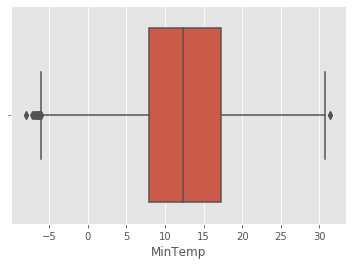

In [21]:
sns.boxplot(x=df['MinTemp'])

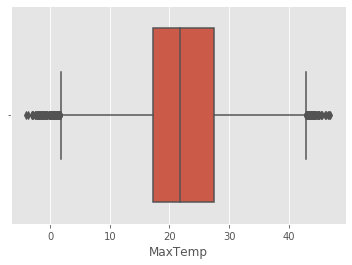

In [22]:
sns.boxplot(x=df['MaxTemp'])

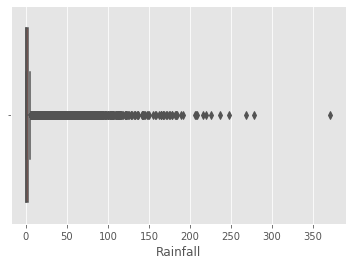

In [23]:
sns.boxplot(x=df['Rainfall'])

After seeing these few plots, we see that just approximating some boundary for the outlier and removing it would not give accurate results.
Since normalization plays a huge role in the algorithms. If we do not handle outliers properly, the normalization process could go wrong.
So, to deal with outliers,I have used the IQR score function to detect and replace such values.

Fixing outliers by the function created which helps to detect outliers by the value of IQR score.
The values which are less than (Q1 - 1.5 * IQR) i.e. min and greater than (Q3 + 1.5* IQR) i.e max are outliers and 
these values are replaced by min and max respectively.

In [24]:
def fixoutliers(x):
##Get all the column name from the input dataframe x
    xColumnNames=x.columns
    print(xColumnNames)
    #for j in df2ColumnNames:

    for j in xColumnNames:
        try:
            print("colnames ",j)
            xy=x[j]    
            mydata=pd.DataFrame()
            #print(xy)
            updated=[]
            Q1,Q3=np.percentile(xy,[25,75])
            IQR=Q3-Q1
            minimum=Q1-1.5*IQR
            maximum=Q3+1.5*IQR
            for i in xy:
                if(i>maximum):
                    print("Entering maxim")
                    i=maximum
                    updated.append(i)
                elif(i<minimum):
                    print("enterinf minimum")
                    i=minimum
                    updated.append(i)
                else:
                    updated.append(i)
            x[j]=updated
        except:
            continue
    return x

In [25]:
tempdf=fixoutliers(tempdf)
tempdf1=fixoutliers(tempdf1)

RangeIndex(start=0, stop=16, step=1)
colnames  0
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
colnames  1
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
enterinf minimum
Entering maxim
Entering maxim
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
Enterin

Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering m

Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering m

colnames  5
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxi

colnames  9
colnames  10
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
Entering maxim
enterinf minimum
enterinf minimum
Entering maxim
enterinf minimum
Entering maxim
Entering maxim
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
enterinf minimum
Entering maxim
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
enterinf minimum
Entering maxim
Entering maxim
Entering maxim
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
Entering maxim
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
enterinf minimum
Entering maxim
Entering maxim
enterinf minimum
enterinf minimum
Entering maxim
enterinf minimum
enterinf minimum
enterinf minimum
Entering 

Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering maxim
Entering m

colnames  14
colnames  15


Renaming the columns for better understanding..

In [26]:
tempdf=tempdf.rename(columns={0: "MinTemp", 1: "MaxTemp",2: "Rainfall",3: "Evaporation",4:"Sunshine",5:"WindGustSpeed",
                      6:"WindSpeed",7:"Humidity",8:"Pressure",9:"Cloud",10:"Temp",11:"LocationInt",12:"WindGustDirInt",
                      13:"WindDirInt",14:"RainTodayInt",15:"RainTomorrowInt"})

In [27]:
tempdf1=tempdf1.rename(columns={0: "ID", 1: "MinTemp",2: "MaxTemp",3: "Rainfall",4:"Evaporation",5:"Sunshine",
                      6:"WindGustSpeed",7:"WindSpeed",8:"Humidity",9:"Pressure",10:"Cloud",11:"Temp",12:"LocationInt",
                      13:"WindGustDirInt",14:"WindDirInt",15:"RainTodayInt"})
tempdf1=tempdf1.drop(["ID"],axis=1)

***Here we can visualize the correlation matrix which helps us to identify how each variable is affecting our decision variable RainTomorrowInt.***

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt,RainTomorrowInt
MinTemp,1.000000,0.741838,0.088588,0.608337,0.057270,0.128543,0.121310,0.018283,-0.404825,0.032549,0.713507,-0.020758,-0.152904,-0.171734,0.066345,0.098697
MaxTemp,0.741838,1.000000,-0.216729,0.752705,0.519988,0.016390,0.017377,-0.497205,-0.347740,-0.343509,0.980249,-0.031831,-0.207464,-0.198834,-0.241568,-0.191689
Rainfall,0.088588,-0.216729,1.000000,-0.217030,-0.392490,0.194307,0.091859,0.417857,-0.146235,0.326648,-0.220629,0.006990,0.123083,0.123499,0.887212,0.362566
Evaporation,0.608337,0.752705,-0.217030,1.000000,0.446777,0.219070,0.155960,-0.484633,-0.308859,-0.294106,0.721948,0.083869,-0.084865,-0.070842,-0.248960,-0.191874
Sunshine,0.057270,0.519988,-0.392490,0.446777,1.000000,-0.076239,0.067671,-0.753962,0.030457,-0.815848,0.548956,-0.027543,-0.051704,-0.025035,-0.383698,-0.564412
WindGustSpeed,0.128543,0.016390,0.194307,0.219070,-0.076239,1.000000,0.684471,0.021843,-0.422893,0.160654,-0.030054,0.070773,0.164180,0.147064,0.177164,0.264673
WindSpeed,0.121310,0.017377,0.091859,0.155960,0.067671,0.684471,1.000000,-0.002637,-0.245704,0.019909,-0.004800,0.065386,0.112034,0.105648,0.089452,0.102967
Humidity,0.018283,-0.497205,0.417857,-0.484633,-0.753962,0.021843,-0.002637,1.000000,-0.006879,0.647761,-0.555613,0.005920,0.054248,0.019431,0.414842,0.515753
Pressure,-0.404825,-0.347740,-0.146235,-0.308859,0.030457,-0.422893,-0.245704,-0.006879,1.000000,-0.132826,-0.307498,0.060625,-0.043374,-0.021526,-0.123439,-0.269859
Cloud,0.032549,-0.343509,0.326648,-0.294106,-0.815848,0.160654,0.019909,0.647761,-0.132826,1.000000,-0.395996,-0.012523,0.078049,0.056189,0.324197,0.522232


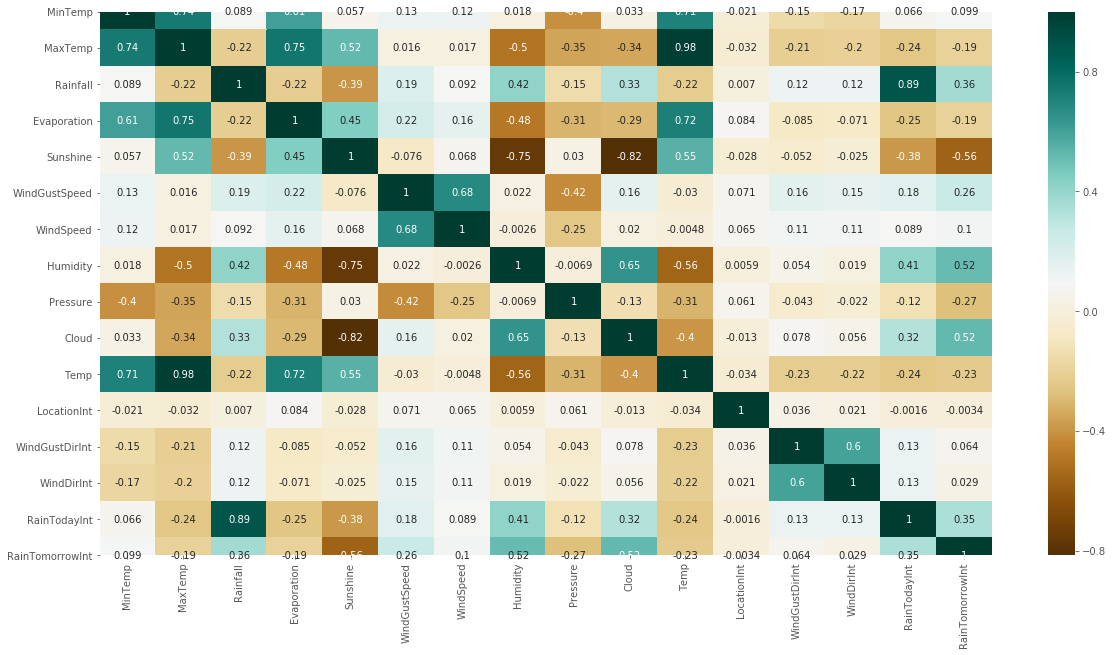

In [28]:
plt.figure(figsize=(20,10))
c= tempdf.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Normalizing the values in both the training as well as the testing dataset as per algorithm's requirements. This function considers all the columns and normalizes it using inbuilt function

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(tempdf)
df_normalized = pd.DataFrame(np_scaled, columns=tempdf.columns, index=tempdf.index)
df_normalized.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt,RainTomorrowInt
count,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000,51978.000000
mean,0.498669,0.504027,0.462817,0.510301,0.466412,0.484908,0.468526,0.553486,0.500543,0.462178,0.505493,0.492797,0.523829,0.523843,0.307394,0.490958
std,0.173170,0.172060,0.271755,0.185678,0.188672,0.194788,0.215484,0.213068,0.184962,0.209944,0.175606,0.295435,0.300381,0.301303,0.458066,0.499923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.287136,0.375000,0.314128,0.335664,0.320988,0.401789,0.375000,0.299419,0.375000,0.229167,0.266667,0.266667,0.000000,0.000000
50%,0.491848,0.486650,0.287136,0.489818,0.470717,0.447552,0.469136,0.558585,0.502660,0.505932,0.488636,0.479167,0.533333,0.533333,0.000000,0.000000
75%,0.625000,0.625000,0.572281,0.625000,0.618370,0.601399,0.592593,0.705581,0.625000,0.629694,0.625000,0.750000,0.800000,0.800000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
min_max_scaler1 = preprocessing.MinMaxScaler()
np_scaled1 = min_max_scaler1.fit_transform(tempdf1)
df_normalized1 = pd.DataFrame(np_scaled1, columns=tempdf1.columns, index=tempdf1.index)
df_normalized1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt
count,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000
mean,0.513337,0.503611,0.527366,0.513269,0.432605,0.484700,0.468100,0.591237,0.500516,0.586491,0.505054,0.494980,0.525288,0.524099,0.306266
std,0.180568,0.174967,0.236360,0.189181,0.177561,0.195816,0.215967,0.208266,0.190075,0.181182,0.178563,0.295159,0.298717,0.300949,0.458156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.386139,0.375000,0.375000,0.375000,0.289781,0.335664,0.320988,0.444976,0.375000,0.440474,0.375000,0.229167,0.266667,0.266667,0.000000
50%,0.502122,0.483911,0.375000,0.494465,0.437306,0.447552,0.469136,0.598086,0.504121,0.614975,0.485825,0.500000,0.533333,0.533333,0.000000
75%,0.643564,0.625000,0.625000,0.625000,0.573869,0.601399,0.592593,0.741627,0.625000,0.734123,0.625000,0.750000,0.800000,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# K-Means Clustering

# Hyperparameters
The K-Means model returned the best results with a recall of 0.77 and an accuracy of 0.73. 
***number of clusters= 2 because the model is used for binary classification.
n_init parameter=number of times the algorithm will run with different centroids
max_iter parameter=maximum number of iterations of the k-means algorithm for a single run***

Using Kmeans function to implement the clustering algorithm

In [31]:
tempdf=tempdf.rename(columns={0: "MinTemp", 1: "MaxTemp",2: "Rainfall",3: "Evaporation",4:"Sunshine",5:"WindGustSpeed",
                      6:"WindSpeed",7:"Humidity",8:"Pressure",9:"Cloud",10:"Temp",11:"LocationInt",12:"WindGustDirInt",
                      13:"WindDirInt",14:"RainTodayInt",15:"RainTomorrowInt"})
tempdf

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt,RainTomorrowInt
0,18.9,23.7,0.0,6.514129,5.922113,41.00000,28.0,55.0,1026.0,5.248843,22.4,26.0,10.000000,10.0,0.0,1.0
1,11.1,20.8,0.0,4.800000,8.300000,39.00000,26.0,48.0,1014.4,7.000000,19.5,28.0,13.000000,15.0,0.0,0.0
2,15.9,19.5,6.0,2.539183,1.204625,44.00000,9.0,99.0,1028.5,7.887935,17.8,14.0,9.000000,12.0,1.0,1.0
3,0.0,14.9,0.0,0.793902,7.286779,35.00000,19.0,55.0,1023.0,4.000000,14.2,6.0,15.000000,14.0,0.0,1.0
4,9.1,22.7,0.0,5.297548,7.989558,41.00000,7.0,40.0,1027.1,3.536497,22.5,43.0,5.000000,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51973,20.1,25.8,5.6,4.400000,8.200000,28.00000,13.0,72.0,1018.9,3.000000,24.7,11.0,2.000000,9.0,1.0,1.0
51974,14.2,18.6,2.8,4.000000,0.000000,41.00000,20.0,52.0,1022.3,8.106601,17.2,37.0,10.000000,9.0,1.0,1.0
51975,11.1,17.2,1.2,1.755335,2.471695,31.00000,11.0,92.0,1018.7,7.818608,12.9,4.0,13.000000,13.0,1.0,1.0
51976,19.0,24.8,0.0,5.200000,7.500000,34.84807,17.0,65.0,1015.4,7.000000,23.4,37.0,3.050274,0.0,0.0,0.0


In [32]:
x = tempdf.drop(['RainTomorrowInt','RainTodayInt'],axis = 1)
y = tempdf['RainTomorrowInt']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [34]:
kmeans = KMeans(n_clusters=2, n_init=25, max_iter=100, random_state=6)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=25, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [35]:
kmeans.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'precompute_distances', 'n_init', 'verbose', 'random_state', 'copy_x', 'n_jobs', 'algorithm', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

In [36]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 1])

In [37]:
pred = kmeans.predict(x_test)
kmeans=pred
kmeans

array([0, 1, 1, ..., 0, 0, 1])

In [38]:
print(classification_report(y_test,pred))
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      7872
         1.0       0.70      0.77      0.73      7722

    accuracy                           0.72     15594
   macro avg       0.72      0.72      0.72     15594
weighted avg       0.72      0.72      0.72     15594



Predicted,0,1,All
True,,,
0.0,5307,2565,7872
1.0,1765,5957,7722
All,7072,8522,15594


**Finally we've plotted an ROC curve with an AUC of 0.727**

In [39]:
fpr,tpr,_ = roc_curve(y_test,pred)

AUC:0.7227969283990625


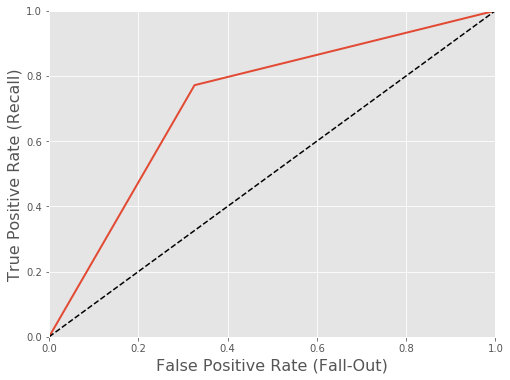

In [40]:
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)  
    

plt.figure(figsize=(8, 6))                     
plot_roc_curve(fpr, tpr)
print("AUC:{}".format(roc_auc_score(y_test, pred)))
plt.show()

# Using the Elbow method to estimate the value of number of clusters required to get the best performance for kmeans.

As we can see in the graph that the joint of the elbow is at 2. The idea behind the elbow method is to implement k-means clustering on a given dataset for a range of values of k and for each value of k, calculate the sum of squared errors (SSE). Here, the optimal value for k is 2.

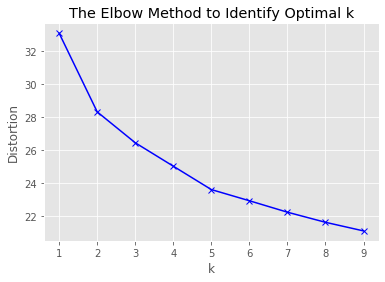

In [41]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tempdf)
    kmeanModel.fit(tempdf)
    distortions.append(sum(np.min(cdist(tempdf, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tempdf.shape[0])
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

# Using Hierarchical Agglomerative Clustering with the help of dendograms for explanation

Hierarchical clustering is where you build a cluster tree (a dendrogram) to represent data, where each group(node) links to two or more successor groups. 

Implementing the Dendogram on Training dataset:
A dendogram is a type of tree diagram showing hierarchical clustering relationships between similar sets of data. They are frequently used in biology to show clustering between genes or samples, but they can represent any type of grouped data.

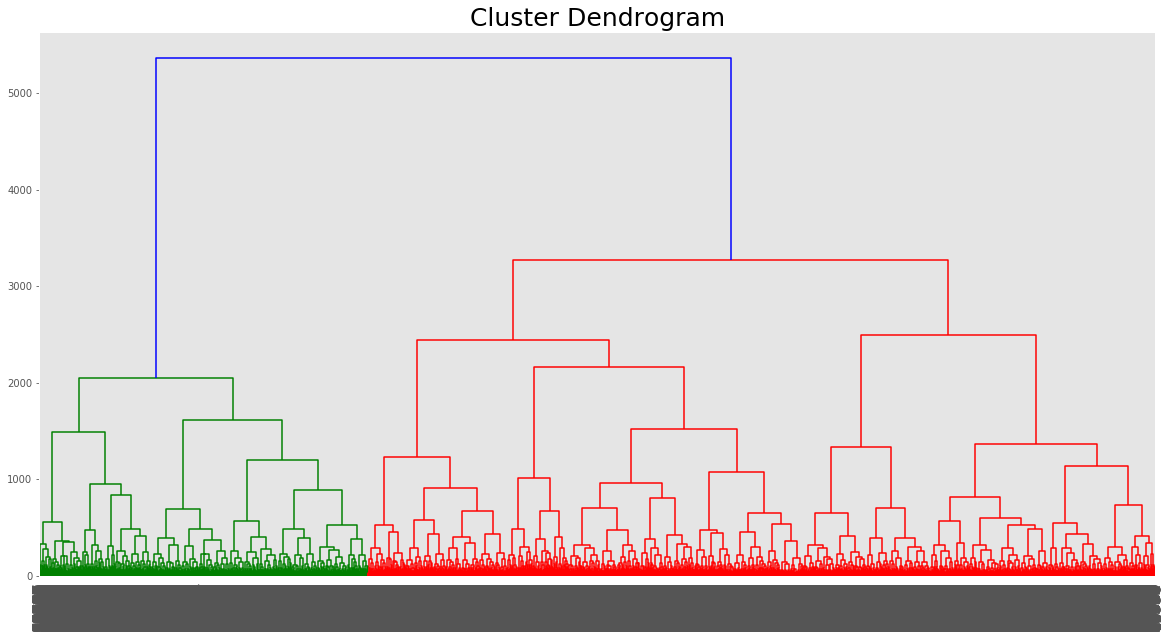

In [42]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(tempdf)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix, orientation='top', labels=tempdf.index)
plt.xticks(fontsize=15)
plt.show()   

In [43]:
tempdf=tempdf.rename(columns={0: "MinTemp", 1: "MaxTemp",2: "Rainfall",3: "Evaporation",4:"Sunshine",5:"WindGustSpeed",
                      6:"WindSpeed",7:"Humidity",8:"Pressure",9:"Cloud",10:"Temp",11:"LocationInt",12:"WindGustDirInt",
                      13:"WindDirInt",14:"RainTodayInt",15:"RainTomorrowInt"})
tempdf

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt,RainTomorrowInt
0,18.9,23.7,0.0,6.514129,5.922113,41.00000,28.0,55.0,1026.0,5.248843,22.4,26.0,10.000000,10.0,0.0,1.0
1,11.1,20.8,0.0,4.800000,8.300000,39.00000,26.0,48.0,1014.4,7.000000,19.5,28.0,13.000000,15.0,0.0,0.0
2,15.9,19.5,6.0,2.539183,1.204625,44.00000,9.0,99.0,1028.5,7.887935,17.8,14.0,9.000000,12.0,1.0,1.0
3,0.0,14.9,0.0,0.793902,7.286779,35.00000,19.0,55.0,1023.0,4.000000,14.2,6.0,15.000000,14.0,0.0,1.0
4,9.1,22.7,0.0,5.297548,7.989558,41.00000,7.0,40.0,1027.1,3.536497,22.5,43.0,5.000000,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51973,20.1,25.8,5.6,4.400000,8.200000,28.00000,13.0,72.0,1018.9,3.000000,24.7,11.0,2.000000,9.0,1.0,1.0
51974,14.2,18.6,2.8,4.000000,0.000000,41.00000,20.0,52.0,1022.3,8.106601,17.2,37.0,10.000000,9.0,1.0,1.0
51975,11.1,17.2,1.2,1.755335,2.471695,31.00000,11.0,92.0,1018.7,7.818608,12.9,4.0,13.000000,13.0,1.0,1.0
51976,19.0,24.8,0.0,5.200000,7.500000,34.84807,17.0,65.0,1015.4,7.000000,23.4,37.0,3.050274,0.0,0.0,0.0


In [44]:
tempdf1.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt
0,15.3,21.5,4.4,2.400000,1.400000,70.0,22.0,69.0,997.6,7.0,19.8,31.0,7.0,13.0,1.0
1,7.1,11.0,6.0,1.200000,5.800000,48.0,19.0,46.0,1014.0,4.0,10.7,33.0,10.0,12.0,1.0
2,3.6,16.6,0.2,2.800000,9.300000,37.0,15.0,48.0,1016.6,5.0,15.4,15.0,7.0,3.0,0.0
3,17.6,37.4,0.0,12.257187,14.024753,37.0,19.0,11.0,1010.4,2.0,34.6,48.0,6.0,7.0,0.0
4,11.4,25.6,0.0,6.000000,2.800000,31.0,13.0,52.0,1016.4,7.0,24.3,39.0,2.0,10.0,0.0


Implementing the Dendogram on Testing dataset

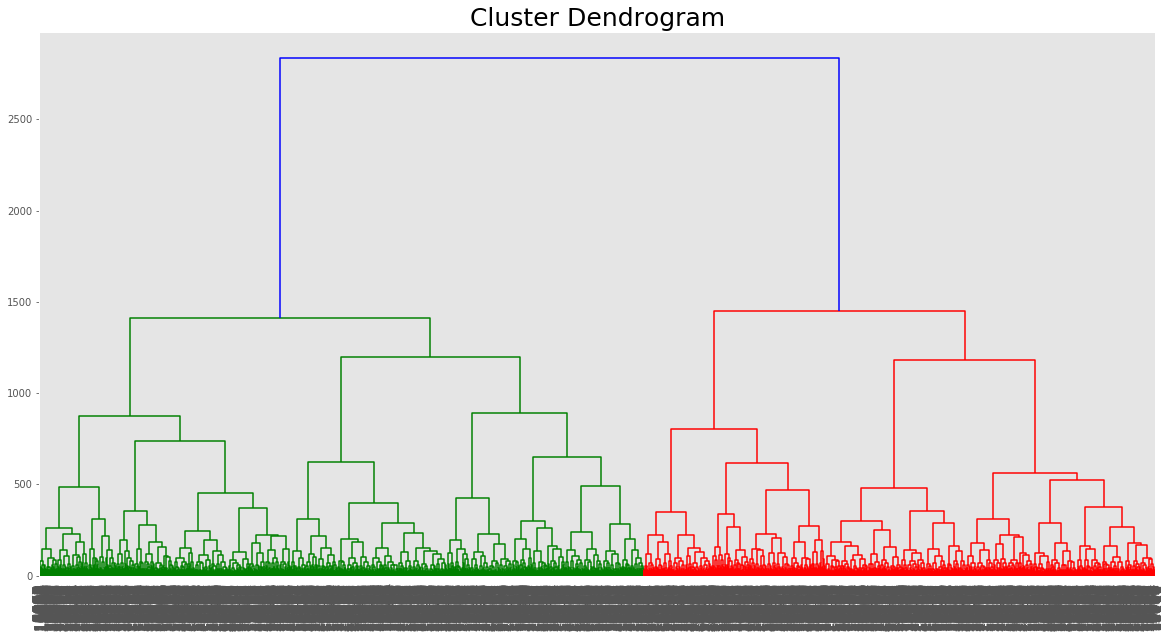

In [45]:
linkage_matrix1 = ward(tempdf1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix1, orientation='top', labels=tempdf1.index)
plt.xticks(fontsize=15)
plt.show()  

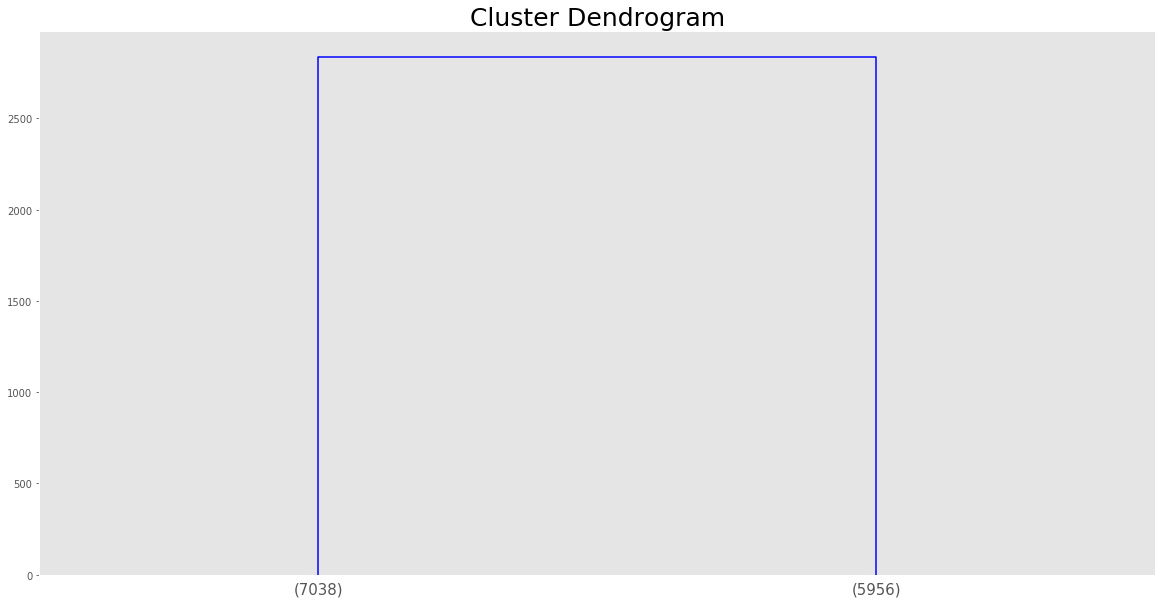

In [46]:
linkage_matrix1 = ward(tempdf1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
ax.set_title('Cluster Dendrogram', fontsize = 25)
ax = dendrogram(linkage_matrix1, orientation='top',truncate_mode="lastp",labels=tempdf1.index,p=2)
plt.xticks(fontsize=15)
plt.show()  

The ROC curve for HAC can be seen below, It has an auc of 0.647

In [47]:
x = tempdf.drop(['RainTomorrowInt','RainTodayInt'],axis = 1)
y = tempdf['RainTomorrowInt']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [49]:
clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=2,linkage = "ward").fit(x)


In [50]:
HAC=clustering.labels_

We can see that we get recall value of 0.90 with an accuracy of 0.637

In [51]:
# Accuracy
lab = 1 - clustering.labels_
((lab == y).sum())/(lab == y).count()

0.6572203624610412

In [52]:
print(confusion_matrix(y,lab))
print(classification_report(y,lab))

[[12230 14229]
 [ 3588 21931]]
              precision    recall  f1-score   support

         0.0       0.77      0.46      0.58     26459
         1.0       0.61      0.86      0.71     25519

    accuracy                           0.66     51978
   macro avg       0.69      0.66      0.64     51978
weighted avg       0.69      0.66      0.64     51978



We can see that the ROC curve has an AUC value of 0.642

AUC:0.6608117265677169


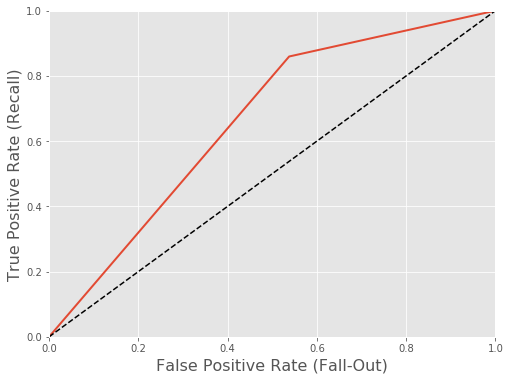

In [53]:
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)  
    
fpr,tpr,_ = roc_curve(y,lab)
plt.figure(figsize=(8, 6))                     
plot_roc_curve(fpr, tpr)
print("AUC:{}".format(roc_auc_score(y, lab)))
plt.show()

In [54]:
tempdf.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed,Humidity,Pressure,Cloud,Temp,LocationInt,WindGustDirInt,WindDirInt,RainTodayInt,RainTomorrowInt
0,18.9,23.7,0.0,6.514129,5.922113,41.0,28.0,55.0,1026.0,5.248843,22.4,26.0,10.0,10.0,0.0,1.0
1,11.1,20.8,0.0,4.800000,8.300000,39.0,26.0,48.0,1014.4,7.000000,19.5,28.0,13.0,15.0,0.0,0.0
2,15.9,19.5,6.0,2.539183,1.204625,44.0,9.0,99.0,1028.5,7.887935,17.8,14.0,9.0,12.0,1.0,1.0
3,0.0,14.9,0.0,0.793902,7.286779,35.0,19.0,55.0,1023.0,4.000000,14.2,6.0,15.0,14.0,0.0,1.0
4,9.1,22.7,0.0,5.297548,7.989558,41.0,7.0,40.0,1027.1,3.536497,22.5,43.0,5.0,2.0,0.0,0.0


# Decision Tree Classifer

Decision tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree to go from observations about an item to conclusions

In [55]:
x=tempdf.drop(["RainTomorrowInt"],axis=1)

In [56]:
y=tempdf.RainTomorrowInt

In [57]:
clf=DecisionTreeClassifier()

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(f"train data size is {x_train.shape}")

train data size is (36384, 15)


In [59]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [60]:
y_pred = clf.predict(x_test)
clf.tree_.max_depth

26

In [61]:
y_pred

array([1., 0., 1., ..., 1., 1., 0.])

In [62]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100)}%")

Accuracy: 79.0%


In [63]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                 

In [64]:
print(grid.best_score_)

0.7935631046613896


In [65]:
for hps, values in grid.best_params_.items():
  print(f"{hps}: {values}")

criterion: gini
max_depth: 10
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 2


In [66]:
num_vars = tempdf.select_dtypes(['int64', 'float64']).columns
x = tempdf[num_vars]
x=tempdf.drop(["RainTomorrowInt"],axis=1)
y = tempdf.RainTomorrowInt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
y_pred = clf.predict(x_test)

In [68]:
DT=y_pred

# Performance Reporting

In [69]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy: 77.83%


In [70]:
df_confusion = pd.crosstab(y_test, y_pred)
df_confusion.columns.name = "Pred"
df_confusion

Pred,0.0,1.0
RainTomorrowInt,,
0.0,6151,1752
1.0,1705,5986


In [71]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      7903
         1.0       0.77      0.78      0.78      7691

    accuracy                           0.78     15594
   macro avg       0.78      0.78      0.78     15594
weighted avg       0.78      0.78      0.78     15594



In [72]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20, 30],
              'max_depth': [4, 5, 6, 10, 15, 20],
              'min_samples_leaf': [ 1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10, 15, 20],
                

In [73]:
bstrap = ShuffleSplit(n_splits=10, test_size=0.3, random_state=16)
grid_bstrap = GridSearchCV(clf, param_grid, cv=bstrap)
grid_bstrap.fit(x_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=16, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'en

# Data testing, Prediction and Interpretation

# Hyperparameters for best performing model

In [74]:
print(f"Accuracy: {round(grid_bstrap.best_score_*100, 2)}%")

Accuracy: 79.31%


In [75]:
for key, value in grid_bstrap.best_params_.items():
  print(f"Hyperparameter: {key}; Value: {value}")

Hyperparameter: criterion; Value: gini
Hyperparameter: max_depth; Value: 10
Hyperparameter: max_leaf_nodes; Value: 20
Hyperparameter: min_samples_leaf; Value: 1
Hyperparameter: min_samples_split; Value: 2


In [76]:
all_predictions=pd.DataFrame(list(zip(df1["ID"],kmeans,HAC,DT)), 
               columns =['ID', 'kmeans','HAC','DT']) 

In [77]:
all_predictions.to_csv("Predictions1.csv",index=False)

# Table for Reporting:

In [79]:
#Model Comparison 
data = {'Model':['Manual tuning', 'Grid Search CV', 'Bootstrap resampling'],
        'Max Depth':[26,10,10],
        'min_samples_split':[2,2,2],
        'min_samples_leaf':[1,1,1],
        'max_leaf_nodes': [None,20,20],
        'Accuracy(%)':[79.00,79.35,79.31]
       }
pd.DataFrame(data)

,Model,Max Depth,min_samples_split,min_samples_leaf,max_leaf_nodes,Accuracy(%)
0,Manual tuning,26,2,1,NaN,79.00
1,Grid Search CV,10,2,1,20.0,79.35
2,Bootstrap resampling,10,2,1,20.0,79.31


***We can look for the accuracy as well as other parameters like recall to evaluate any model***